In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import data trong csv
df = pd.read_csv("sales.csv")
df.head()

,index,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
# kiem tra null
df.isnull().sum()

index                      0
TV Ad Budget ($)           0
Radio Ad Budget ($)        0
Newspaper Ad Budget ($)    0
Sales ($)                  0
dtype: int64

In [4]:
# sua ten + xoa cot index
df = df.iloc[:, 1:]
df = df.rename(
    columns={
        "TV Ad Budget ($)": "TV",
        "Radio Ad Budget ($)": "Radio",
        "Newspaper Ad Budget ($)": "Newspaper",
        "Sales ($)": "Sales",
    }
)
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


Heatmap - hệ số tương quan

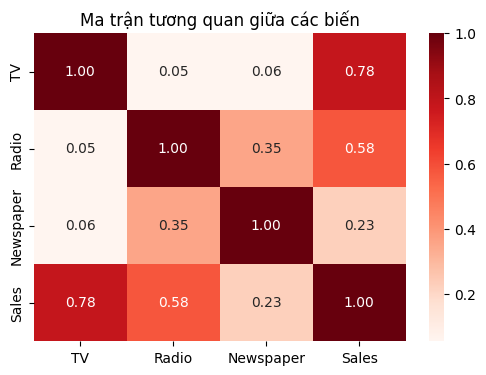

In [5]:
# ve bang heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.Reds, fmt=".2f")
plt.title("Ma trận tương quan giữa các biến")
plt.show()

# Mô hình hồi quy tuyến tính đa biến

In [6]:
# tao mô hình
model = LinearRegression()
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [7]:
# chia tập train : test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [8]:
# train mô hình
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [9]:
# dự đoán
y_pred = model.predict(X_test)

# In kết quả

In [10]:
# Công thức tính biến phụ thuộc y
coef_df = pd.DataFrame(model.coef_, X.columns, columns=['Hệ số (beta)'])
print("Hệ số hồi quy:", coef_df)
print(f"Hệ số chặn: {model.intercept_:.4f}")

# In phương trình hồi quy tuyến tính
print("\nPhương trình hồi quy tuyến tính:")
equation = f"Sales = {model.intercept_:.4f}"

for col, coef in zip(X.columns, model.coef_):
    equation += f" + ({coef:.4f})*{col}"
print(equation)

Hệ số hồi quy:            Hệ số (beta)
TV             0.046999
Radio          0.187065
Newspaper      0.003455
Hệ số chặn: 2.6439

Phương trình hồi quy tuyến tính:
Sales = 2.6439 + (0.0470)*TV + (0.1871)*Radio + (0.0035)*Newspaper


In [11]:
# Đánh giá mô hình thông qua tập test
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")

# so sánh thực tế
comparion = pd.DataFrame({"Thực tế": y_test, "Dự đoán": y_pred})
print(comparion.head())

MSE: 2.1705
R²: 0.8476
     Thực tế    Dự đoán
112     14.1  13.790798
165     11.9  14.594244
12       9.2  10.556128
73      11.0   9.900030
144     11.4  10.068195


C:\Users\DOAN CAO THANH TUYEN\AppData\Local\Temp\ipykernel_7204\713112142.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_temp[[c for c in features if c != col]] = X_test[[c for c in features if c != col]].mean()
C:\Users\DOAN CAO THANH TUYEN\AppData\Local\Temp\ipykernel_7204\713112142.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_temp[[c for c in features if c != col]] = X_test[[c for c in features if c != col]].mean()
C:\Users\DOAN CAO THANH TUYEN\AppData\Local\Temp\ipykernel_7204\713112142.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, intege

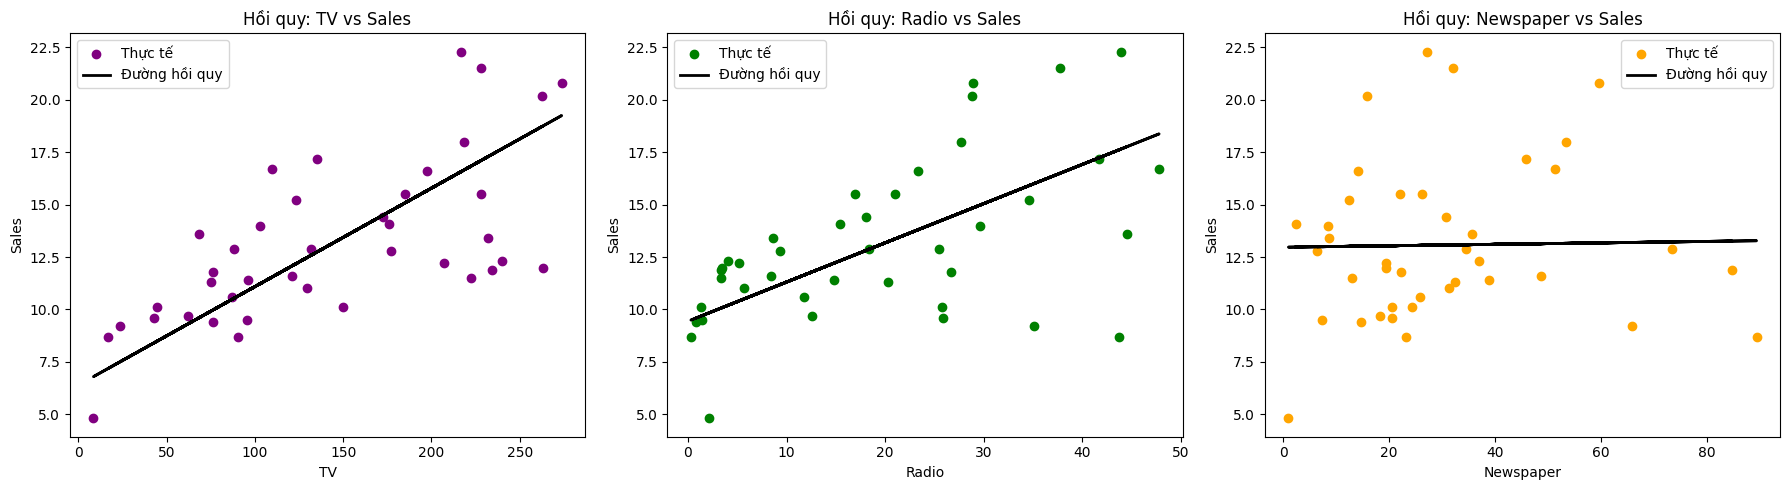

In [12]:
# 7. Vẽ biểu đồ từng biến (TV, Radio, Newspaper)
fig, axs = plt.subplots(1, 3, figsize=(18,5))

features = ['TV', 'Radio', 'Newspaper']
colors = ['purple', 'green', 'orange']

for i, col in enumerate(features):
    axs[i].scatter(X_test[col], y_test, color=colors[i], label='Thực tế')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Sales')
    axs[i].set_title(f'Hồi quy: {col} vs Sales')

    # Tính giá trị dự đoán tuyến tính theo cột hiện tại (giữ các biến khác ở giá trị trung bình)
    X_temp = X_test.copy()
    X_temp[[c for c in features if c != col]] = X_test[[c for c in features if c != col]].mean()
    y_line = model.predict(X_temp)
    
    # Vẽ đường hồi quy
    axs[i].plot(X_test[col], y_line, color='black', linewidth=2, label='Đường hồi quy')

    axs[i].legend()

plt.tight_layout()
plt.show()